#  Selecting Different ROI's

In [1]:
import skxray.roi as roi
import skxray.correlation as corr

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

## Rectangle ROI

In [4]:
shape = (15, 26)
roi_data = np.array(([2, 2, 6, 3], [6, 7, 8, 5], [8, 18, 5, 10]),
                        dtype=np.int64)

all_roi_inds = roi.rectangles(roi_data, shape)
roi_inds, pixel_list = corr.extract_label_indices(all_roi_inds)

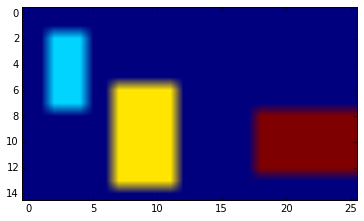

In [7]:
plt.imshow(all_roi_inds)
plt.show()

## Ring ROI"s

In [8]:
center = (100., 100.)
img_dim = (200, 205)
first_q = 10.
delta_q = 5.
num_rings = 7  # number of Q rings
one_step_q = 5.0
step_q = [2.5, 3.0, 5.8]


In [10]:
# test when there is same spacing between rings
edges = roi.ring_edges(first_q, width=delta_q, spacing=one_step_q,
                           num_rings=num_rings)
label_array = roi.rings(edges, center, img_dim)

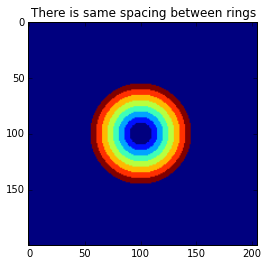

In [20]:
plt.imshow(label_array)
plt.title("There is same spacing between rings")
plt.show()

In [12]:
# test when there is different spacing between rings
edges = roi.ring_edges(first_q, width=delta_q, spacing=step_q,
                           num_rings=4)
print("edges when there is different spacing between rings", edges)
label_array = roi.rings(edges, center, img_dim)

('edges when there is different spacing between rings', array([[ 10. ,  15. ],
       [ 17.5,  22.5],
       [ 25.5,  30.5],
       [ 36.3,  41.3]]))


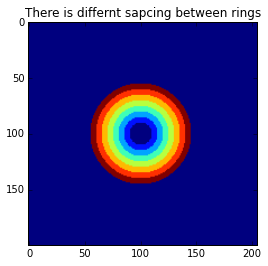

In [18]:
plt.imshow(label_array)
plt.title("There is differnt sapcing between rings")
plt.show()

In [15]:
# test when there is no spacing between rings
edges = roi.ring_edges(first_q, width=delta_q, num_rings=num_rings)
print("edges", edges)
label_array = roi.rings(edges, center, img_dim)

('edges', array([[ 10.,  15.],
       [ 15.,  20.],
       [ 20.,  25.],
       [ 25.,  30.],
       [ 30.,  35.],
       [ 35.,  40.],
       [ 40.,  45.]]))


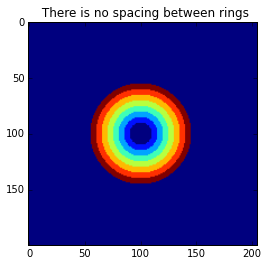

In [17]:
plt.imshow(label_array)
plt.title(" There is no spacing between rings")
plt.show()

##  Segmented Rings

In [21]:
center = (75, 75)
img_dim = (150, 140)
first_q = 5
delta_q = 5
num_rings = 4  # number of Q rings
slicing = 4

edges = roi.ring_edges(first_q, width=delta_q, spacing=4,
                           num_rings=num_rings)
print("edges", edges)

label_array = roi.segmented_rings(edges, slicing, center,
                                      img_dim, offset_angle=0)

('edges', array([[  5.,  10.],
       [ 14.,  19.],
       [ 23.,  28.],
       [ 32.,  37.]]))


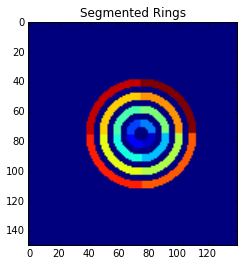

In [23]:
plt.imshow(label_array)
plt.title("Segmented Rings")
plt.show()


In [30]:
first_q=0
edges = roi.ring_edges(first_q, width=50, num_rings=1)
print("edges", edges)

slicing = 10
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_dim, offset_angle=0)

('edges', array([[  0.,  50.]]))


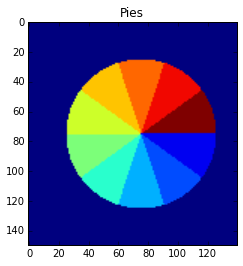

In [31]:
plt.imshow(label_array)
plt.title("Pies")
plt.show()